$\dfrac{\partial}{\partial x} \left( \dfrac{\partial c^2 U}{\partial x} \right) = \dfrac{\partial^2 U}{\partial t^2}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def vibrating_string(L, N, c, dt, T, psi):
    # Initialization
    dx = L / N
    # psi = np.zeros(N+1)         # Wave function at current step
    psi_new = np.zeros(N+1)     # Wave function at next step
    psi_old = np.zeros(N+1)

    # Initial condition
    # psi[int(np.floor(N / 2))] = init_cond

    # First time step (using a different scheme, e.g., forward difference)
    for i in range(1, N):
        psi_new[i] = psi[i] + 0.5 * (c*dt/dx)**2 * (psi[i+1] - 2*psi[i] + psi[i-1])

    # Time evolution
    time_steps = int(T / dt)
    for _ in range(1, time_steps):
        psi_old, psi = psi, psi_new  # Update time steps
        for i in range(1, N):
            psi_new[i] = 2*psi[i] - psi_old[i] + (c*dt/dx)**2 * (psi[i+1] - 2*psi[i] + psi[i-1])

        # Apply boundary conditions
        psi_new[0], psi_new[N] = 0, 0  # Fixed ends

    return psi_new


In [3]:
# Simulation parameters
L = 1.0      # Length of the string
N = 100      # Number of intervals (N+1 points)
c = 1.0      # Wave speed
dt = 0.001   # Time step
T = 1.0      # Total time of simulation

## ADD Taylor??


<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:24: SyntaxWarning: invalid escape sequence '\P'
<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:24: SyntaxWarning: invalid escape sequence '\P'
C:\Users\sacha\AppData\Local\Temp\ipykernel_6612\1673021712.py:22: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(xs, psi_new, label=f'State at  ($\Psi(x, {np.round(T, 2)})$)')
C:\Users\sacha\AppData\Local\Temp\ipykernel_6612\1673021712.py:24: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('Wave function ($\Psi$)')


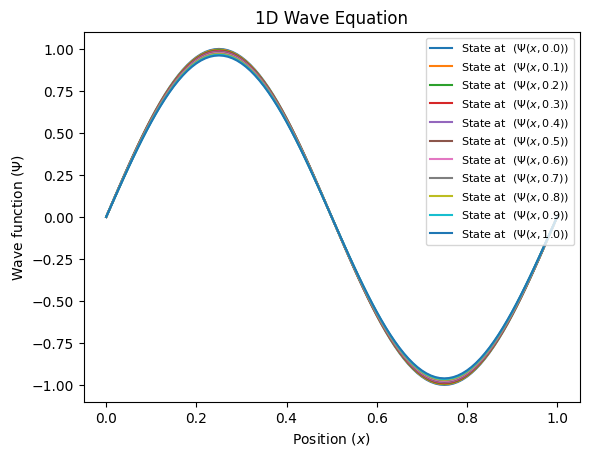

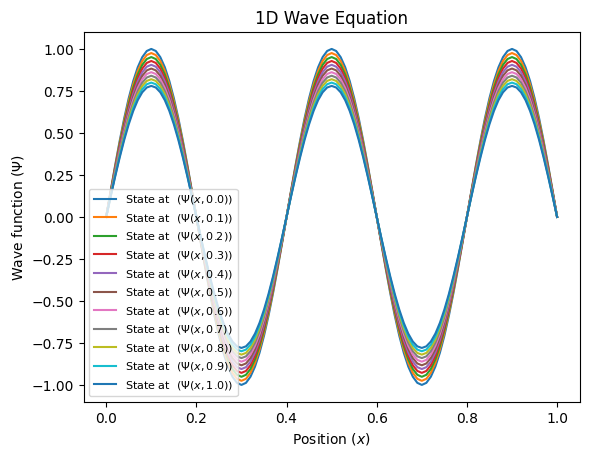

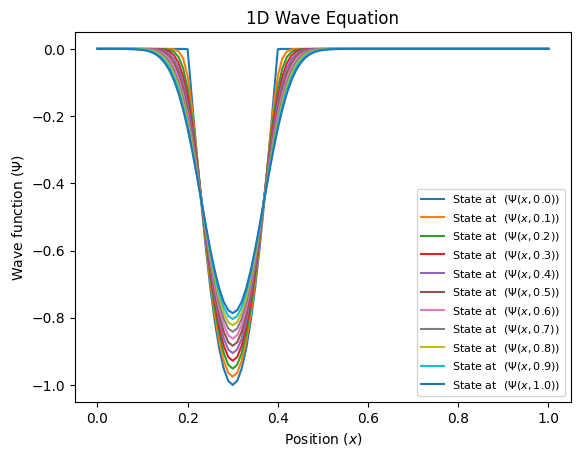

In [10]:
xs = np.linspace(0, L, N+1)  # Position array

def timestepping(xs):
    i = np.sin(2*np.pi*xs)
    ii = np.sin(5*np.pi*xs)
    iii = []
    for x in xs:
        if x > 1/5 and x < 2/5:
            iii.append(np.sin(5*np.pi*x))
        else: 
            iii.append(0)

    psis = [i, ii, iii]
    return psis

psis = timestepping(xs)
for psi in psis:
    for T in np.arange(0, 1.1, 0.2):
        psi_new = vibrating_string(L, N, c, dt, T, psi)

        # Plot the final state
        plt.plot(xs, psi_new, label=f'State at  ($\Psi(x, {np.round(T, 2)})$)')
    plt.xlabel('Position ($x$)')
    plt.ylabel('Wave function ($\Psi$)')
    plt.title('1D Wave Equation')
    plt.legend(fontsize = 8)
    plt.show()

In [5]:
# Simulation parameters
L = 1.0      # Length of the string
N = 100      # Number of intervals (N+1 points)
c = 1.0      # Wave speed
dt = 0.001   # Time step
T = 1.0      # Total time of simulation

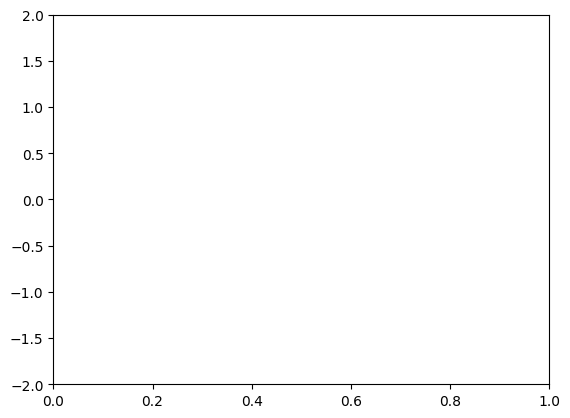

In [13]:
from matplotlib import pyplot as plt 
import numpy as np 
from matplotlib import animation 

# initializing a figure in 
# which the graph will be plotted 
fig = plt.figure() 

# marking the x-axis and y-axis 
axis = plt.axes(xlim =(0, 1), 
				ylim =(-2, 2)) 

# fig, ax = plt.subplots()

x = np.linspace(0, L, N+1)  # Position array
# line, = ax.plot(x, np.sin(5*np.pi*x))

def init(): 
	line.set_ydata(np.ma.array(x, mask=True))
	return line,

def animate(i):
	t = i * dt

	# plots a sine graph 
	y = vibrating_string(L, N, c, dt, t, psi)
	line.set_ydata(y) 
	
	return line,

psi = np.sin(5*np.pi*x)
ani = animation.FuncAnimation(fig, animate, frames=int(T/dt), init_func=init, blit=True)

writergif = animation.PillowWriter(fps=30)
ani.save('filename.gif',writer=writergif)
# ani.save('continuousSineWave.mp4', fps = 30)
